## Task 1

In [1]:
import pybedtools


In [2]:
def autosomal_chromosomes_filter(chromoname):
    autosomal_chromosomes = [f'chr{num}' for num in range(1,23)]
    return chromoname in autosomal_chromosomes

In [3]:
'''
filepath:input file path
outputpath:output file path
vercol: column index of chrXX column
begcol: column index of the first column should be stored
endcol: column index of the last column should be stored
'''
def file_filter(filepath,outputpath,vercol,begcol,endcol):
    with open(filepath,'r') as f:
        lines = f.readlines()
    ret = open(outputpath,'w')
    for l in lines:
        values = l.split()
        if autosomal_chromosomes_filter(values[vercol]):
            ret.write('\t'.join(values[begcol:endcol]) + '\n')
    ret.close()
    f.close()
    

In [4]:
file_filter('cpgIslandExt.txt','cpg.bed',1,1,4)

In [5]:
file_filter('hg19.chrom.sizes','hg19.autochrom.sizes',0,0,3)

In [6]:
cpg_islands = pybedtools.BedTool('cpg.bed').sort(g='hg19.autochrom.sizes')
cpg_islands.saveas('cpg.bed')

<BedTool(cpg.bed)>

In [7]:
shore_border = 2000
shelf_border = 2000

In [8]:
shores = cpg_islands.flank(g='hg19.autochrom.sizes', b=shore_border).subtract(cpg_islands).sort(g='hg19.autochrom.sizes').merge()

In [9]:
shores.saveas('shore.bed')

<BedTool(shore.bed)>

In [10]:
shelves = shores.flank(g='hg19.autochrom.sizes', b= shelf_border).subtract(cpg_islands).subtract(shores).sort(g='hg19.autochrom.sizes').merge()

In [11]:
shelves.saveas('shelf.bed')

<BedTool(shelf.bed)>

In [12]:
merge_beds = pybedtools.BedTool(list(cpg_islands)+list(shores)+list(shelves))

In [13]:
seas = merge_beds.sort(g='hg19.autochrom.sizes').complement(g='hg19.autochrom.sizes').merge()

In [14]:
seas.saveas('sea.bed')

<BedTool(sea.bed)>

In [15]:
file_filter('HAIB.A549.EtOH.Rep.3.bed','automethy.bed',0,0,3)

## Task 2

In [16]:
from pybedtools.featurefuncs import midpoint

In [17]:
autosomal_methylation = pybedtools.BedTool([midpoint(m) for m in pybedtools.BedTool('automethy.bed')])

## Task 3

In [18]:
def get_number(chromosome):
    return len(autosomal_methylation.intersect(chromosome))

In [19]:
numberlist = []
metcpg = get_number(cpg_islands)
numberlist.append(metcpg)
metshore = get_number(shores)
numberlist.append(metshore)
metshelf = get_number(shelves)
numberlist.append(metshelf)
metsea = get_number(seas)
numberlist.append(metsea)

In [20]:
%matplotlib inline

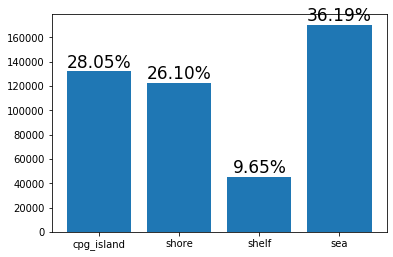

In [21]:
import matplotlib.pyplot as plt
sumnum = metcpg + metshore + metshelf + metsea
metcpgp = metcpg/sumnum
metshorep = metshore/sumnum
metshelfp = metshelf/sumnum
metseap = metsea/sumnum
name_list=['cpg_island','shore','shelf','sea']
plt.bar(range(len(numberlist)), numberlist, tick_label=name_list)
plt.text(0,numberlist[0]+0.05,'%.2f%%'%(metcpgp*100), ha='center', va='bottom',fontsize=17)
plt.text(1,numberlist[1]+0.05,'%.2f%%'%(metshorep*100), ha='center', va='bottom',fontsize=17)
plt.text(2,numberlist[2]+0.05,'%.2f%%'%(metshelfp*100), ha='center', va='bottom',fontsize=17)
plt.text(3,numberlist[3]+0.05,'%.2f%%'%(metseap*100), ha='center', va='bottom',fontsize=17)
plt.show()